In [218]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [212]:
def plot_clusters(X, labels, cluster_centers):
    plt.figure(figsize=(6, 6))
    # Создаем список уникальных меток кластеров
    unique_labels = np.unique(labels)
    # Цвета для каждого кластера
    colors = ['blue', 'green', 'red', 'orange', 'yellow', 'purple']
    for label in unique_labels:
        # Выбираем точки, принадлежащие к текущему кластеру
        cluster_points = X[labels == label]
        # Отрисовываем точки текущего кластера
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[label], label=f'Cluster {label}')
    # Отрисовываем центры кластеров
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=100, label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Clusters')
    plt.legend()
    plt.grid(True)
    plt.show()

def profile(X, n_clusters):
    # Инициализируем и обучаем модель K-means
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)

    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Вычисляем компактность каждого кластера как среднее расстояние до центра
    compactness = []
    for i in range(n_clusters):
        cluster_points = X[labels == i]
        
        # Вычисляю разницу между точками и центроидами
        # Определяю норму вектора
        # ВОзвожу в квадрат
        # Суммирую
        compactness.append(np.sum(np.linalg.norm(cluster_points - cluster_centers[i], axis=1)**2))

    print(f"Компактность кластеров: {sum(compactness)}")
    print(f"\nКоординаты центров кластеров:\n{cluster_centers}")

    plot_clusters(X, labels, cluster_centers)

Компактность кластеров: 78.85144142614601

Координаты центров кластеров:
[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


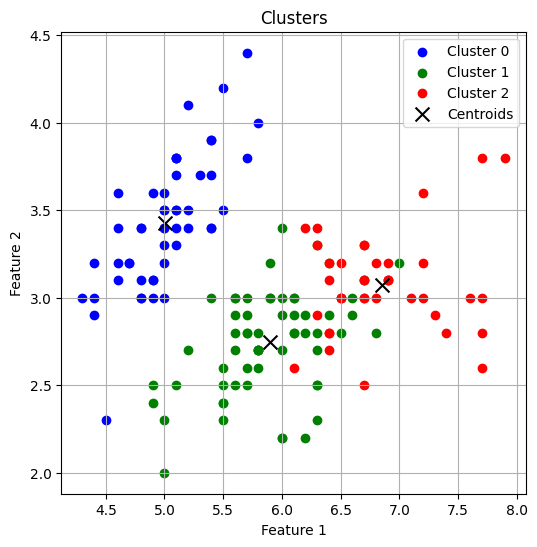

In [213]:
# Загрузка датасета ирисов Фишера
iris = load_iris()

# Данные и метки классов
X = iris.data
y = iris.target

profile(X, 3)

# Выполним оценку для бинарного класса

Компактность кластеров: 27.417045491293994

Координаты центров кластеров:
[[-2.51848924  9.01738071]
 [ 4.64513257  1.96152801]]


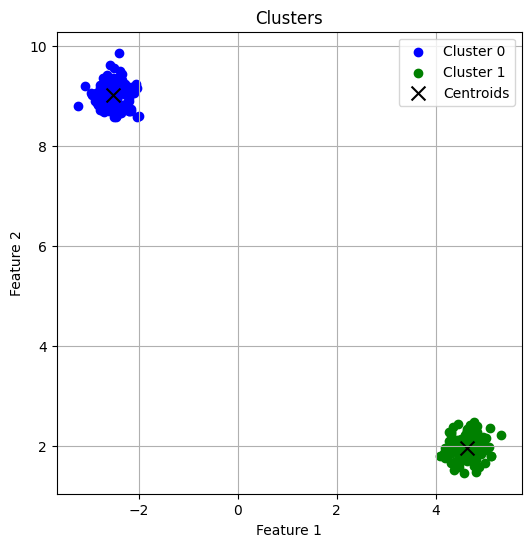

In [217]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=2,
                       cluster_std=0.22, random_state=42)

profile(X, 2)